In [1]:
import h5py as h5

import os 
import numpy as np 
import nbodykit.lab as NBlab
from astropy.utils.misc import NumpyRNGContext
from nbodykit.hod import Zheng07Model, HODModel



In [2]:
params = {'flat': True, 'H0': 67.11, 'Om0': 0.3175, 'Ob0': 0.049, 'sigma8': 0.834, 'ns': 0.9624}
cosmo_nb = NBlab.cosmology.Planck15.clone(
            h=params['H0']/100., 
            Omega0_b=params['Ob0'], 
            Omega0_cdm=params['Om0']-params['Ob0'],
            n_s=params['ns']) 

Lbox = 1000.0
p_hod = {
        'logMmin': 13.03, 
        'sigma_logM':0.38,
        'logM0': 13.27, 
        'logM1': 14.08, 
        'alpha': 0.76
        }


In [10]:
ldir = '/mnt/home/spandey/ceph/AR_NPE/test_data/'
df_truth_vox = h5.File(os.path.join(ldir, 'test_halos_truth_vox_Nmax5.hdf5'), 'r')
group_data = {}  
group_data['Position']  = df_truth_vox['pos_h'][:]
group_data['Velocity']  = 0.0*df_truth_vox['pos_h'][:]
group_data['Mass']      = 10**df_truth_vox['lgMass'][:]
cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
hod_test = hod.view()
gal_pos_truth_vox = hod_test['Position'].compute()

df_nbkit = {}
df_nbkit['Position'] = gal_pos_truth_vox
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
Pk_truth_vox = r.power




# df_mock_vox = h5.File(os.path.join(ldir, 'test_halos_mock_vox_Nmax5.hdf5'), 'r')
# df_truth = 


/tmp/ipykernel_2845648/3076841356.py:18: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')


In [16]:
ldir = '/mnt/home/spandey/ceph/AR_NPE/test_data/'
df_mock_vox = h5.File(os.path.join(ldir, 'test_halos_mock_vox_Nmax5.hdf5'), 'r')
group_data = {}  
group_data['Position']  = df_mock_vox['pos_h'][:]
group_data['Velocity']  = 0.0*df_mock_vox['pos_h'][:]
group_data['Mass']      = 10**df_mock_vox['lgMass'][:]
cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
hod_test = hod.view()
gal_pos_mock_vox = hod_test['Position'].compute()

df_nbkit = {}
df_nbkit['Position'] = gal_pos_mock_vox
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
Pk_mock_vox = r.power


/tmp/ipykernel_2845648/2669115038.py:18: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')


In [17]:
ji = 1
snapnum = 4
snap_dir_base = '/mnt/home/spandey/ceph/Quijote/fiducial_HR_new/Halos/Rockstar'
snapdir = snap_dir_base + '/' + str(ji)  #folder hosting the catalogue
rockstar = np.loadtxt(snapdir + '/out_' + str(snapnum) + '_pid.list')
with open(snapdir + '/out_' + str(snapnum) + '_pid.list', 'r') as f:
    lines = f.readlines()
header = lines[0].split()
# get the properties of the halos
pos_h_truth = rockstar[:,header.index('X'):header.index('Z')+1]
index_M = header.index('M200c')                    
mass_truth = rockstar[:,index_M]  #Halo masses in Msun/h
group_data = {}  
group_data['Position']  = pos_h_truth
group_data['Velocity']  = 0.0*pos_h_truth
group_data['Mass']      = mass_truth
cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
hod_test = hod.view()
gal_pos_truth = hod_test['Position'].compute()

df_nbkit = {}
df_nbkit['Position'] = gal_pos_truth
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
Pk_truth = r.power




/tmp/ipykernel_2845648/2047650690.py:28: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')


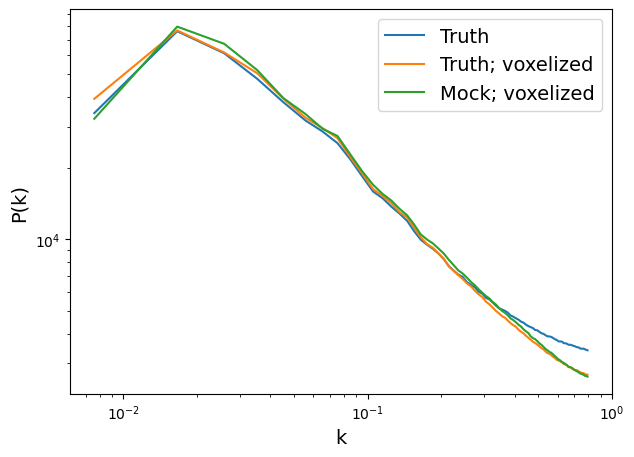

In [21]:
import matplotlib.pyplot as pl
pl.figure(figsize=(7,5))
pl.plot(Pk_truth['k'], Pk_truth['power'].real, label='Truth')
pl.plot(Pk_truth_vox['k'], Pk_truth_vox['power'].real, label='Truth; voxelized')
pl.plot(Pk_mock_vox['k'], Pk_mock_vox['power'].real, label='Mock; voxelized')
# pl.plot(k_mockxtruth_chirag, Pk_mockxtruth_chirag, label='mockxtruth_chirag')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k)', size=14)
pl.xscale('log')
pl.yscale('log')




In [40]:
ldir = '/mnt/home/spandey/ceph/AR_NPE/test_data/'

nsims = 5
Pk_truth_vox_all_sim = []
Pk_mock_vox_all_sim = []
Pk_truth_all_sim = []

for ji in range(nsims):

    df_truth_vox = h5.File(os.path.join(ldir, 'test_halos_truth_vox_Nmax5_sim_' + str(ji) + '.hdf5'), 'r')
    group_data = {}  
    group_data['Position']  = df_truth_vox['pos_h'][:]
    group_data['Velocity']  = 0.0*df_truth_vox['pos_h'][:]
    group_data['Mass']      = 10**df_truth_vox['lgMass'][:]
    cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
    halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
    hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
    hod_test = hod.view()
    gal_pos_truth_vox = hod_test['Position'].compute()

    df_nbkit = {}
    df_nbkit['Position'] = gal_pos_truth_vox
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_truth_vox = r.power
    Pk_truth_vox_all_sim.append(Pk_truth_vox['power'].real)


    df_mock_vox = h5.File(os.path.join(ldir, 'test_halos_mock_vox_Nmax5_sim_' + str(ji) + '.hdf5'), 'r')
    group_data = {}  
    group_data['Position']  = df_mock_vox['pos_h'][:]
    group_data['Velocity']  = 0.0*df_mock_vox['pos_h'][:]
    group_data['Mass']      = 10**df_mock_vox['lgMass'][:]
    cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
    halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
    hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
    hod_test = hod.view()
    gal_pos_mock_vox = hod_test['Position'].compute()

    df_nbkit = {}
    df_nbkit['Position'] = gal_pos_mock_vox
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_mock_vox = r.power
    Pk_mock_vox_all_sim.append(Pk_mock_vox['power'].real)

    jsim = ji + 5
    snapnum = 4
    snap_dir_base = '/mnt/home/spandey/ceph/Quijote/fiducial_HR_new/Halos/Rockstar'
    snapdir = snap_dir_base + '/' + str(jsim)  #folder hosting the catalogue
    rockstar = np.loadtxt(snapdir + '/out_' + str(snapnum) + '_pid.list')
    with open(snapdir + '/out_' + str(snapnum) + '_pid.list', 'r') as f:
        lines = f.readlines()
    header = lines[0].split()
    # get the properties of the halos
    pos_h_truth = rockstar[:,header.index('X'):header.index('Z')+1]
    index_M = header.index('M200c')                    
    mass_truth = rockstar[:,index_M]  #Halo masses in Msun/h
    group_data = {}  
    group_data['Position']  = pos_h_truth
    group_data['Velocity']  = 0.0*pos_h_truth
    group_data['Mass']      = mass_truth
    cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
    halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
    hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
    hod_test = hod.view()
    gal_pos_truth = hod_test['Position'].compute()

    df_nbkit = {}
    df_nbkit['Position'] = gal_pos_truth
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_truth = r.power
    Pk_truth_all_sim.append(Pk_truth['power'].real)





/tmp/ipykernel_179195/1236903720.py:26: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_179195/1236903720.py:48: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_179195/1236903720.py:80: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_179195/1236903720.py:26: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_179195/1236903720.py:48: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = ca

In [41]:
Pk_truth_vox_all_sim = np.array(Pk_truth_vox_all_sim)
Pk_mock_vox_all_sim = np.array(Pk_mock_vox_all_sim)
Pk_truth_all_sim = np.array(Pk_truth_all_sim)




Text(0.5, 1.0, 'Galaxies, 4Mpc/h resolution')

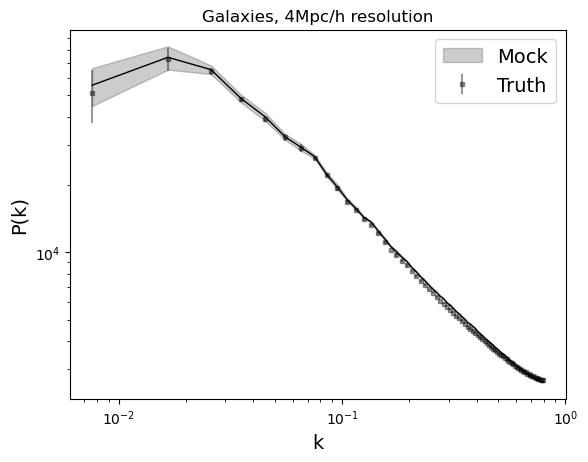

In [44]:
import matplotlib.pyplot as pl
pl.figure()
pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_vox_all_sim, axis=0), yerr=(np.std(Pk_truth_vox_all_sim, axis=0)), color='k', ls='', ms=3.0, marker='s', alpha=0.4, label='Truth')
pl.plot(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim, axis=0), lw=1.0, color='k')
pl.fill_between(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim, axis=0) - np.std(Pk_mock_vox_all_sim, axis=0), np.mean(Pk_mock_vox_all_sim, axis=0) + np.std(Pk_mock_vox_all_sim, axis=0), label='Mock', color='k', alpha=0.2)
# pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_all_sim, axis=0), yerr=np.std(Pk_truth_all_sim, axis=0), label='Truth')
pl.xscale('log')
pl.yscale('log')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k)', size=14)
pl.title('Galaxies, 4Mpc/h resolution')




Text(0.5, 1.0, 'Galaxies, 4Mpc/h resolution')

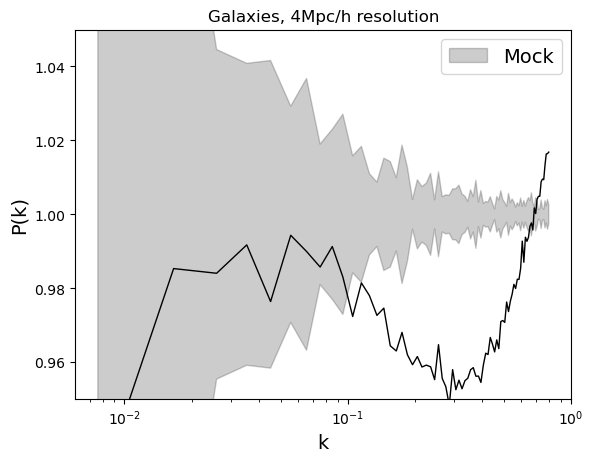

In [49]:
import matplotlib.pyplot as pl
pl.figure()
# pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_vox_all_sim, axis=0), yerr=(np.std(Pk_truth_vox_all_sim, axis=0)), color='k', ls='', ms=3.0, marker='s', alpha=0.4, label='Truth')
pl.plot(Pk_mock_vox['k'], np.mean(Pk_truth_vox_all_sim, axis=0)/np.mean(Pk_mock_vox_all_sim, axis=0), lw=1.0, color='k')
# pl.fill_between(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim, axis=0) - np.std(Pk_mock_vox_all_sim, axis=0), np.mean(Pk_mock_vox_all_sim, axis=0) + np.std(Pk_mock_vox_all_sim, axis=0), label='Mock', color='k', alpha=0.2)
pl.fill_between(Pk_mock_vox['k'], 1- np.std(Pk_mock_vox_all_sim, axis=0)/np.mean(Pk_mock_vox_all_sim, axis=0), 1+ np.std(Pk_mock_vox_all_sim, axis=0)/np.mean(Pk_mock_vox_all_sim, axis=0), label='Mock', color='k', alpha=0.2)
# pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_all_sim, axis=0), yerr=np.std(Pk_truth_all_sim, axis=0), label='Truth')
pl.xscale('log')
# pl.yscale('log')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k)', size=14)
pl.ylim(0.95, 1.05)
pl.title('Galaxies, 4Mpc/h resolution')




In [19]:
np.sqrt(np.std(Pk_truth_vox_all_sim, axis=0))


array([117.55030253,  92.92416237,  46.45836683,  35.9171184 ,
        36.10155715,  33.9242577 ,  34.19087307,  24.79452209,
        21.59661474,  20.36301993,  18.81009211,  14.13435271,
        13.83890371,   9.5195996 ,  11.28680876,  12.40220832,
         6.92720031,  12.54650058,  11.38586818,   9.7714343 ,
         7.46291934,   7.28645809,   7.38963658,   9.57818983,
         7.46417363,   7.13761621,   7.26827681,   3.82591226,
         6.41961967,   4.85093575,   5.0174447 ,   5.18930524,
         4.90944509,   4.35149355,   7.0542115 ,   4.19781823,
         3.41358136,   4.9558363 ,   5.24415415,   4.46542674,
         3.54676648,   4.41792253,   4.44923511,   4.03747513,
         3.67476638,   3.40232224,   5.23617605,   3.3723728 ,
         3.62051632,   2.85951101,   2.81999665,   2.89756759,
         4.11573552,   4.09741172,   3.87439987,   3.91043799,
         3.13146033,   2.22491125,   3.2675484 ,   3.46339828,
         2.84659754,   3.14378348,   2.7491229 ,   2.67